In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercedes-used-car-listing/merc.csv


In [2]:
data = pd.read_csv("../input/mercedes-used-car-listing/merc.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [4]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


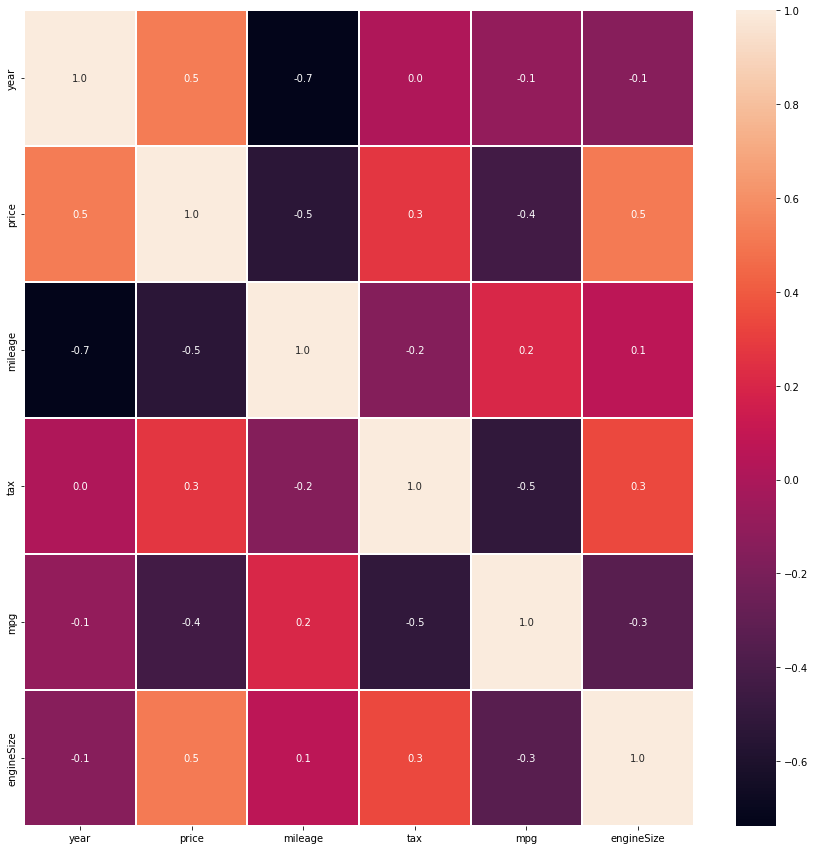

In [5]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidth = 2, fmt = '.1f', ax = ax)
plt.show()

In [6]:
data.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1
7,S Class,2012,10948,Automatic,107000,Petrol,265,36.7,3.5
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
9,GLA Class,2017,19750,Automatic,15258,Diesel,30,64.2,2.1


In [7]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

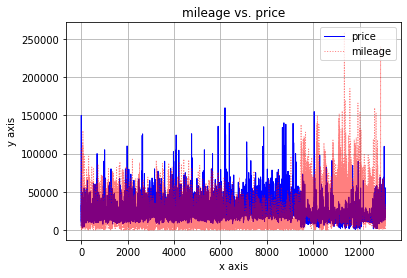

In [8]:
data.price.plot(kind = 'line', color ='b', label = 'price', linewidth =1, alpha=1, grid=True, linestyle='-')
data.mileage.plot(color= 'r', label= 'mileage', linewidth = 1, alpha=0.5, grid=True, linestyle= ':')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('mileage vs. price')
plt.show()
# a line plot which contains comparasion of mileage and price

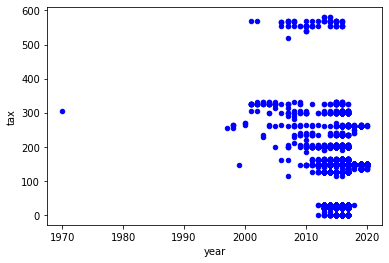

In [9]:
data.plot(kind ='scatter', x ='year', y ='tax', color ='b')
plt.xlabel('year')
plt.ylabel('tax')
plt.show()

# a scatter plot which contains tax rates against year

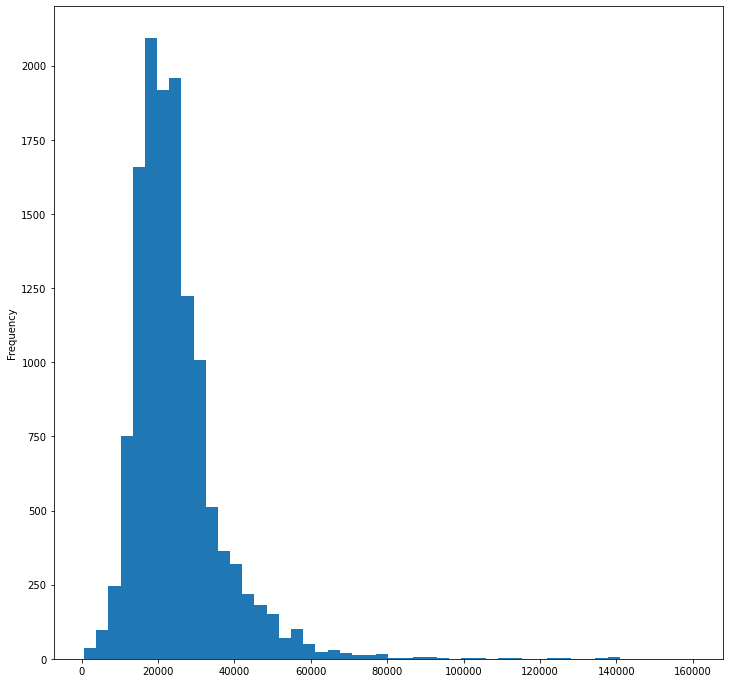

In [10]:
data.price.plot(kind = 'hist', bins = 50, figsize = (12,12))                 # bins: number of bar in the figure
plt.show()
# a histogram plot for the prices

In [11]:
#Filtering
data[np.logical_and(data['year']>2005, data['mileage']<100000)]          # Cars that produced after 2005 and have mileage less that 100000

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [12]:
data[(data['year']>2005) & (data['mileage']<100000)]           # Same answer (Cars that produced after 2005 and have mileage less that 100000)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [13]:
data[(data['year']>2010) & (data['tax']<250)]               # cars which had produced after 2010 and have less tax than 250

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
9,GLA Class,2017,19750,Automatic,15258,Diesel,30,64.2,2.1
10,A Class,2020,32980,Automatic,606,Petrol,145,35.8,2.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [14]:
avg = sum(data.price)/len(data.price)
print(avg)
data["price_level"] = ["A_class" if i > avg else "B_class" for i in data.price]
data.loc[:10,["price_level","price"]]


24698.596920496988


,price_level,price
0,B_class,5200
1,A_class,34948
2,A_class,49948
3,A_class,61948
4,A_class,73948
5,A_class,149948
6,A_class,30948
7,B_class,10948
8,A_class,139948
9,B_class,19750


In [15]:
avg_tax = sum(data.tax)/len(data.tax)
print(avg_tax)
data["tax_level"] = ["high" if i > avg else "low" for i in data.price]
data.loc[:10,["tax_level","tax"]]


129.97217775745102


,tax_level,tax
0,low,325
1,high,20
2,high,555
3,high,325
4,high,325
5,high,570
6,high,145
7,low,265
8,high,145
9,low,30


In [16]:
data.head(10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_level,tax_level
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,B_class,low
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,A_class,high
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,A_class,high
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,A_class,high
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,A_class,high
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2,A_class,high
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1,A_class,high
7,S Class,2012,10948,Automatic,107000,Petrol,265,36.7,3.5,B_class,low
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0,A_class,high
9,GLA Class,2017,19750,Automatic,15258,Diesel,30,64.2,2.1,B_class,low


In [17]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


<AxesSubplot:>

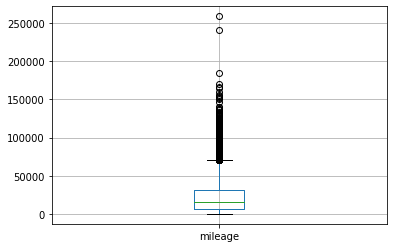

In [18]:
data.boxplot(column='mileage')

<AxesSubplot:>

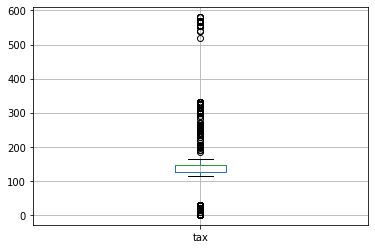

In [19]:
data.boxplot(column='tax')

<AxesSubplot:>

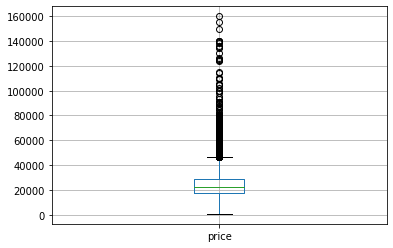

In [20]:
data.boxplot(column='price')

In [21]:
data_new= data.head()
data_new

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_level,tax_level
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,B_class,low
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,A_class,high
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,A_class,high
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,A_class,high
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,A_class,high


In [22]:
melted = pd.melt(frame=data_new, id_vars='model', value_vars=['price','mileage'])
melted


,model,variable,value
0,SLK,price,5200
1,S Class,price,34948
2,SL CLASS,price,49948
3,G Class,price,61948
4,G Class,price,73948
5,SLK,mileage,63000
6,S Class,mileage,27000
7,SL CLASS,mileage,6200
8,G Class,mileage,16000
9,G Class,mileage,4000


In [23]:
melted

,model,variable,value
0,SLK,price,5200
1,S Class,price,34948
2,SL CLASS,price,49948
3,G Class,price,61948
4,G Class,price,73948
5,SLK,mileage,63000
6,S Class,mileage,27000
7,SL CLASS,mileage,6200
8,G Class,mileage,16000
9,G Class,mileage,4000


In [24]:
melted.pivot(columns='variable')

model               value         
variable    mileage      price  mileage    price
0               NaN        SLK      NaN   5200.0
1               NaN    S Class      NaN  34948.0
2               NaN   SL CLASS      NaN  49948.0
3               NaN    G Class      NaN  61948.0
4               NaN    G Class      NaN  73948.0
5               SLK        NaN  63000.0      NaN
6           S Class        NaN  27000.0      NaN
7          SL CLASS        NaN   6200.0      NaN
8           G Class        NaN  16000.0      NaN
9           G Class        NaN   4000.0      NaN

In [25]:
data1 = data.head()
data2 = data.tail()

concat_data_row = pd.concat([data1,data2],axis=0,)
concat_data_row

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_level,tax_level
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,B_class,low
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,A_class,high
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,A_class,high
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,A_class,high
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,A_class,high
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0,A_class,high
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0,A_class,high
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1,A_class,high
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0,A_class,high
13118,S Class,2019,54999,Automatic,2075,Diesel,145,52.3,2.9,A_class,high


In [26]:
data3 = data['year'].head()
data4 = data['price'].head()

concat_data_col = pd.concat([data3,data4],axis=1,)
concat_data_col

,year,price
0,2005,5200
1,2017,34948
2,2016,49948
3,2016,61948
4,2016,73948


In [27]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
price_level      object
tax_level        object
dtype: object

In [28]:
data['model']=data['model'].astype('category')
data['year'] = data['year'].astype('float')

In [29]:
data.dtypes

model           category
year             float64
price              int64
transmission      object
mileage            int64
fuelType          object
tax                int64
mpg              float64
engineSize       float64
price_level       object
tax_level         object
dtype: object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         13119 non-null  category
 1   year          13119 non-null  float64 
 2   price         13119 non-null  int64   
 3   transmission  13119 non-null  object  
 4   mileage       13119 non-null  int64   
 5   fuelType      13119 non-null  object  
 6   tax           13119 non-null  int64   
 7   mpg           13119 non-null  float64 
 8   engineSize    13119 non-null  float64 
 9   price_level   13119 non-null  object  
 10  tax_level     13119 non-null  object  
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 1.0+ MB


In [31]:
data['tax'].value_counts(dropna=False)

145    7645
20     1251
125    1013
30      989
150     855
200     276
160     188
0       172
260     123
300      99
165      65
325      64
205      63
235      52
135      48
305      38
265      36
555      28
570      25
330      18
240      15
140      14
565       8
580       4
540       3
115       3
270       3
190       3
315       2
10        2
230       2
290       2
250       2
255       2
220       1
280       1
195       1
520       1
185       1
210       1
Name: tax, dtype: int64

In [32]:
assert  data['tax'].notnull().all()

<AxesSubplot:>

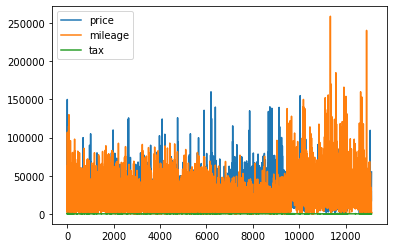

In [33]:
data1 = data.loc[:,['price','mileage','tax']]
data1.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

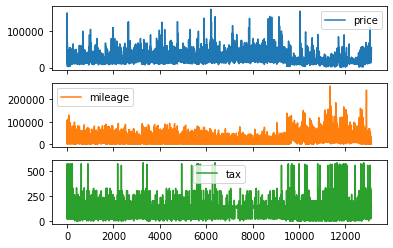

In [34]:
data1.plot(subplots= True)


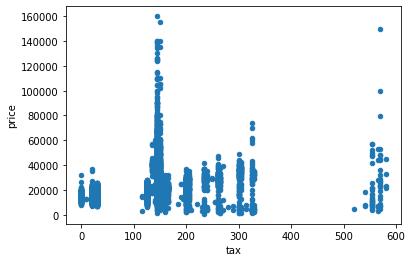

In [35]:

data1.plot(kind='scatter',x='tax',y='price')
plt.show()

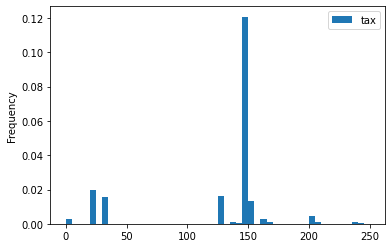

In [36]:
data1.plot(kind='hist',y='tax',bins=50, range=(0,250), density=True)
plt.show()

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

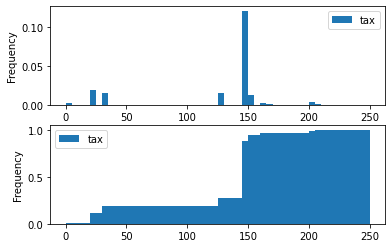

In [37]:
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "tax",bins = 50,range= (0,250),density = True,ax = axes[0])
data1.plot(kind = "hist",y = "tax",bins = 50,range= (0,250),density = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

In [38]:
data2 = data.head()
data2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_level,tax_level
0,SLK,2005.0,5200,Automatic,63000,Petrol,325,32.1,1.8,B_class,low
1,S Class,2017.0,34948,Automatic,27000,Hybrid,20,61.4,2.1,A_class,high
2,SL CLASS,2016.0,49948,Automatic,6200,Petrol,555,28.0,5.5,A_class,high
3,G Class,2016.0,61948,Automatic,16000,Petrol,325,30.4,4.0,A_class,high
4,G Class,2016.0,73948,Automatic,4000,Petrol,325,30.1,4.0,A_class,high


In [39]:
date_list = ('1995-10-12','1995-5-4','1995-8-1','1991-5-8','1991-12-2')
datetime_object = pd.to_datetime(date_list)
data2['date']=datetime_object
data2 = data2.set_index('date')
data2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_level,tax_level
date,,,,,,,,,,,
1995-10-12,SLK,2005.0,5200,Automatic,63000,Petrol,325,32.1,1.8,B_class,low
1995-05-04,S Class,2017.0,34948,Automatic,27000,Hybrid,20,61.4,2.1,A_class,high
1995-08-01,SL CLASS,2016.0,49948,Automatic,6200,Petrol,555,28.0,5.5,A_class,high
1991-05-08,G Class,2016.0,61948,Automatic,16000,Petrol,325,30.4,4.0,A_class,high
1991-12-02,G Class,2016.0,73948,Automatic,4000,Petrol,325,30.1,4.0,A_class,high


In [40]:
print(data2.loc["1991-5-8"])

               model    year  price transmission  mileage fuelType  tax   mpg  \
date                                                                            
1991-05-08   G Class  2016.0  61948    Automatic    16000   Petrol  325  30.4   

            engineSize price_level tax_level  
date                                          
1991-05-08         4.0     A_class      high  


In [41]:
data2.resample('A').mean()

,year,price,mileage,tax,mpg,engineSize
date,,,,,,
1991-12-31,2016.000000,67948.0,10000.000000,325.0,30.25,4.000000
1992-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1994-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-31,2012.666667,30032.0,32066.666667,300.0,40.50,3.133333


In [42]:
data2.resample("M").first().interpolate("pad")

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_level,tax_level
date,,,,,,,,,,,
1991-05-31,G Class,2016.0,61948.0,Automatic,16000.0,Petrol,325.0,30.4,4.0,A_class,high
1991-06-30,G Class,2016.0,61948.0,Automatic,16000.0,Petrol,325.0,30.4,4.0,A_class,high
1991-07-31,G Class,2016.0,61948.0,Automatic,16000.0,Petrol,325.0,30.4,4.0,A_class,high
1991-08-31,G Class,2016.0,61948.0,Automatic,16000.0,Petrol,325.0,30.4,4.0,A_class,high
1991-09-30,G Class,2016.0,61948.0,Automatic,16000.0,Petrol,325.0,30.4,4.0,A_class,high
1991-10-31,G Class,2016.0,61948.0,Automatic,16000.0,Petrol,325.0,30.4,4.0,A_class,high
1991-11-30,G Class,2016.0,61948.0,Automatic,16000.0,Petrol,325.0,30.4,4.0,A_class,high
1991-12-31,G Class,2016.0,73948.0,Automatic,4000.0,Petrol,325.0,30.1,4.0,A_class,high
1992-01-31,G Class,2016.0,73948.0,Automatic,4000.0,Petrol,325.0,30.1,4.0,A_class,high


In [43]:
data2.resample("M").mean().interpolate("pad")

,year,price,mileage,tax,mpg,engineSize
date,,,,,,
1991-05-31,2016.0,61948.0,16000.0,325.0,30.4,4.0
1991-06-30,2016.0,61948.0,16000.0,325.0,30.4,4.0
1991-07-31,2016.0,61948.0,16000.0,325.0,30.4,4.0
1991-08-31,2016.0,61948.0,16000.0,325.0,30.4,4.0
1991-09-30,2016.0,61948.0,16000.0,325.0,30.4,4.0
1991-10-31,2016.0,61948.0,16000.0,325.0,30.4,4.0
1991-11-30,2016.0,61948.0,16000.0,325.0,30.4,4.0
1991-12-31,2016.0,73948.0,4000.0,325.0,30.1,4.0
1992-01-31,2016.0,73948.0,4000.0,325.0,30.1,4.0
